DATA CLEANING STAGE
   Area  Sensing Range  Transmission Range  Number of Sensor nodes  \
0  5000             15                  30                     100   
1  5000             16                  32                     112   
2  5000             17                  34                     124   
3  5000             18                  36                     136   
4  5000             19                  38                     148   

   Number of Barriers  
0                  30  
1                  35  
2                  42  
3                  48  
4                  56  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Area                    182 non-null    int64
 1   Sensing Range           182 non-null    int64
 2   Transmission Range      182 non-null    int64
 3   Number of Sensor nodes  182 non-null    int64
 4   

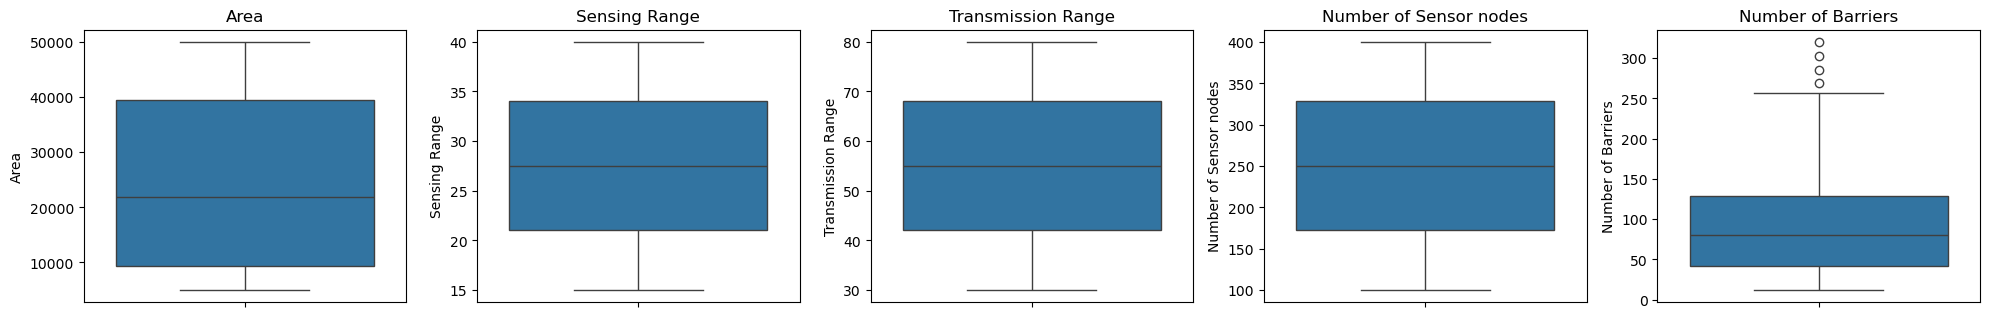

BEFORE outlier removal: (182, 5)
AFTER outlier removal: (178, 5)


In [13]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Loads the dataset into a DataFrame
df = pd.read_csv('dataset.csv', low_memory=False)
print('DATA CLEANING STAGE')

# Displays first 5 rows of the dataset and information about the data
print(df.head())
df.info()

# Checks for null values
print("Null values per column:\n", df.isnull().sum())

# Checks for duplicate entries
print("Number of duplicate rows: ", df.duplicated().sum())

# Checks for outliers using box plot visualisation
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Removes outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("BEFORE outlier removal:", df.shape)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("AFTER outlier removal:", df.shape)


EXPLORATORY DATA ANALYSIS (EDA) STAGE


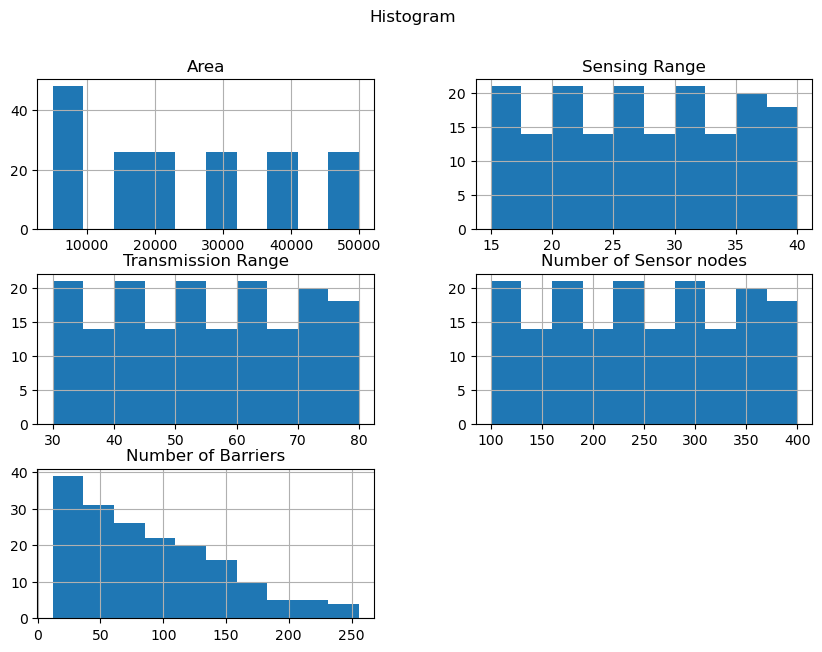

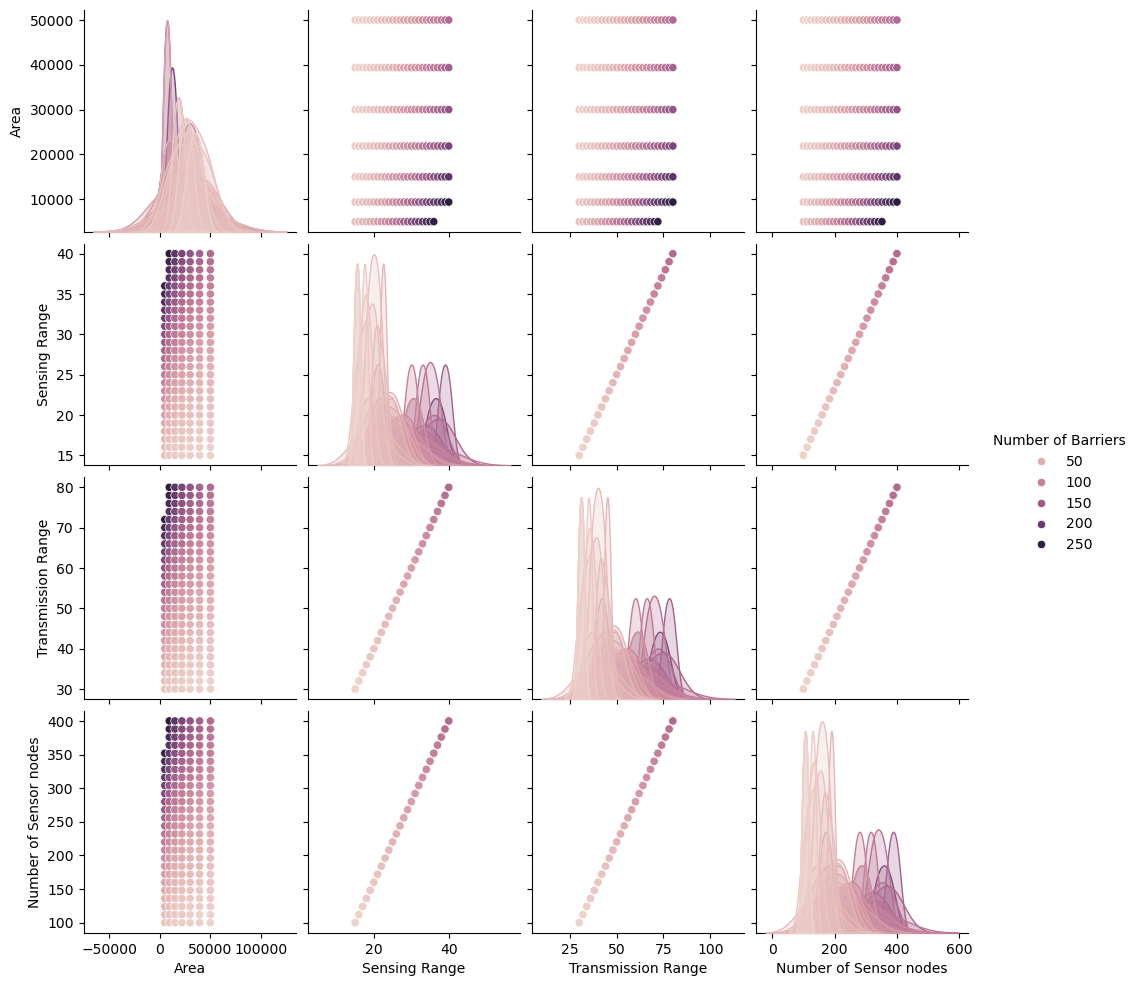

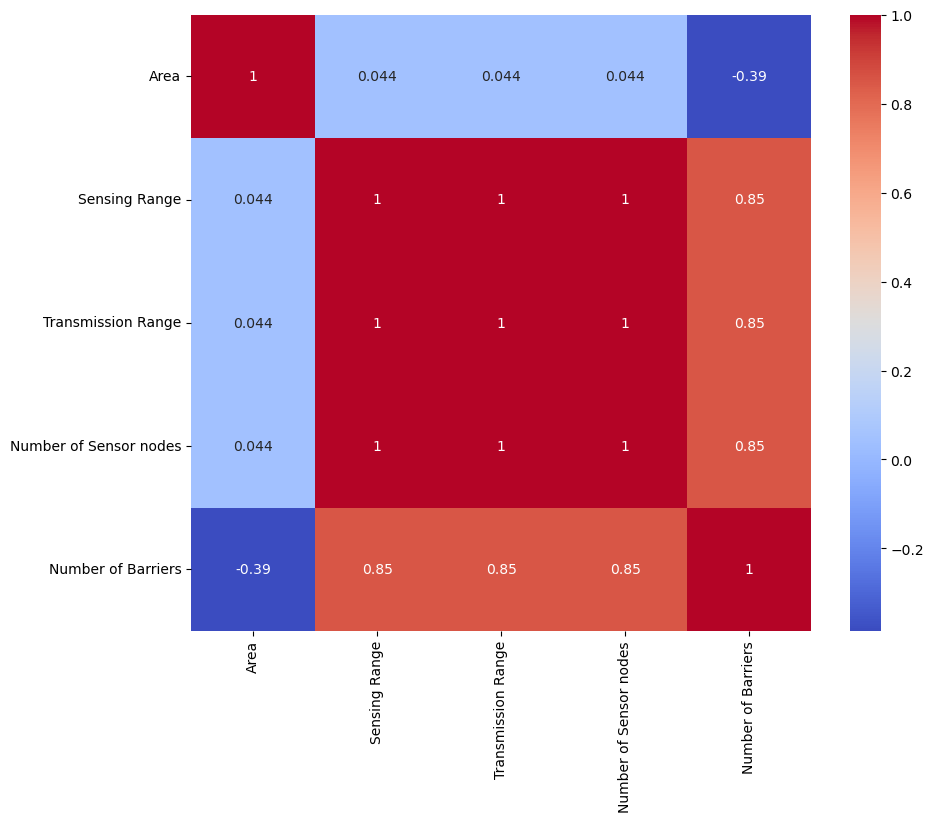

               Area  Sensing Range  Transmission Range  \
count    178.000000     178.000000          178.000000   
mean   24810.393258      27.252809           54.505618   
std    15083.162971       7.417198           14.834396   
min     5000.000000      15.000000           30.000000   
25%     9375.000000      21.000000           42.000000   
50%    21875.000000      27.000000           54.000000   
75%    39375.000000      33.750000           67.500000   
max    50000.000000      40.000000           80.000000   

       Number of Sensor nodes  Number of Barriers  
count              178.000000          178.000000  
mean               247.033708           89.578652  
std                 89.006373           58.407752  
min                100.000000           12.000000  
25%                172.000000           41.250000  
50%                244.000000           78.000000  
75%                325.000000          126.750000  
max                400.000000          256.000000  


In [14]:
print('EXPLORATORY DATA ANALYSIS (EDA) STAGE')
# Histograms created through matplotlib that visualises distribution of features (univariate analysis)
df.hist(figsize=(10,7))
plt.suptitle("Histogram", fontsize=12)
plt.show()

# Pair plots created through seaborn that visualises relationships between variables (multivariate analysis)
sns.pairplot(df, hue='Number of Barriers')
plt.show()

# Correlation heatmap created through matplotlib and seaborn that visualises correlation between variables (multivariate analysis)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Summary statistics obtained using the .describe method
print(df.describe())


In [15]:
print('DATA PREPROCESSING STAGE')

# Distinguishes feature (x / independent) variables from target (y / dependent) variable
X = df.iloc[:, :-1].values #All independent variables (all variables, minus 'Number of Barriers')
y = df.iloc[:, -1].values #Independent variable ('Number of Barriers').

# Splits the data into train and test sets
xrange_train, xrange_test, yrange_train, yrange_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converts feature variables to 2D array for better fit to Random Forest model
if xrange_train.ndim == 1:
    xrange_train = xrange_train.reshape(-1, 1)
if xrange_test.ndim == 1:
    xrange_test = xrange_test.reshape(-1, 1)
    
# Converts target variable to 1D array for better fit to Random Forest model
yrange_train = np.ravel(yrange_train)

# Normalises the independent (x) data within the dataset
scaler = StandardScaler()
xrange_train_scaled = scaler.fit_transform(xrange_train)
xrange_test_scaled = scaler.transform(xrange_test)

# Prints mean and standard deviation before and after normalisation
print('Mean before standardization: area={:.1f}, sensing range={:.1f}, transmission range={:.1f}, number of sensor nodes={:.1f}'.format(X[:,0].mean(), X[:,1].mean(), X[:,2].mean(), X[:,3].mean()))
print('SD before standardization: area={:.1f}, sensing range={:.1f}, transmission range={:.1f}, number of sensor nodes={:.1f}'.format(X[:,0].std(), X[:,1].std(), X[:,2].std(), X[:,3].std()))
print('Mean after standardization (training set): area={:.1f}, sensing range={:.1f}, transmission range={:.1f}, number of sensor nodes={:.1f}'.format(xrange_train_scaled[:,0].mean(), xrange_train_scaled[:,1].mean(), xrange_train_scaled[:,2].mean(), xrange_train_scaled[:,3].mean()))
print('SD after standardization (training set): area={:.1f}, sensing range={:.1f}, transmission range={:.1f}, number of sensor nodes={:.1f}'.format(xrange_train_scaled[:,0].std(), xrange_train_scaled[:,1].std(), xrange_train_scaled[:,2].std(), xrange_train_scaled[:,3].std()))


DATA PREPROCESSING STAGE
Mean before standardization: area=24810.4, sensing range=27.3, transmission range=54.5, number of sensor nodes=247.0
SD before standardization: area=15040.7, sensing range=7.4, transmission range=14.8, number of sensor nodes=88.8
Mean after standardization (training set): area=0.0, sensing range=0.0, transmission range=0.0, number of sensor nodes=-0.0
SD after standardization (training set): area=1.0, sensing range=1.0, transmission range=1.0, number of sensor nodes=1.0


FEATURE SELECTION STAGE
Correlation with target variable:
 Number of Barriers        1.000000
Sensing Range             0.851522
Transmission Range        0.851522
Number of Sensor nodes    0.851522
Area                     -0.385202
Name: Number of Barriers, dtype: float64
Selected features based on correlation:
 Index(['Sensing Range', 'Transmission Range', 'Number of Sensor nodes'], dtype='object')
Feature ranking:
1. feature Transmission Range (0.30140837230058437)
2. feature Sensing Range (0.28405073118745944)
3. feature Number of Sensor nodes (0.23086356887563572)
4. feature Area (0.18367732763632055)


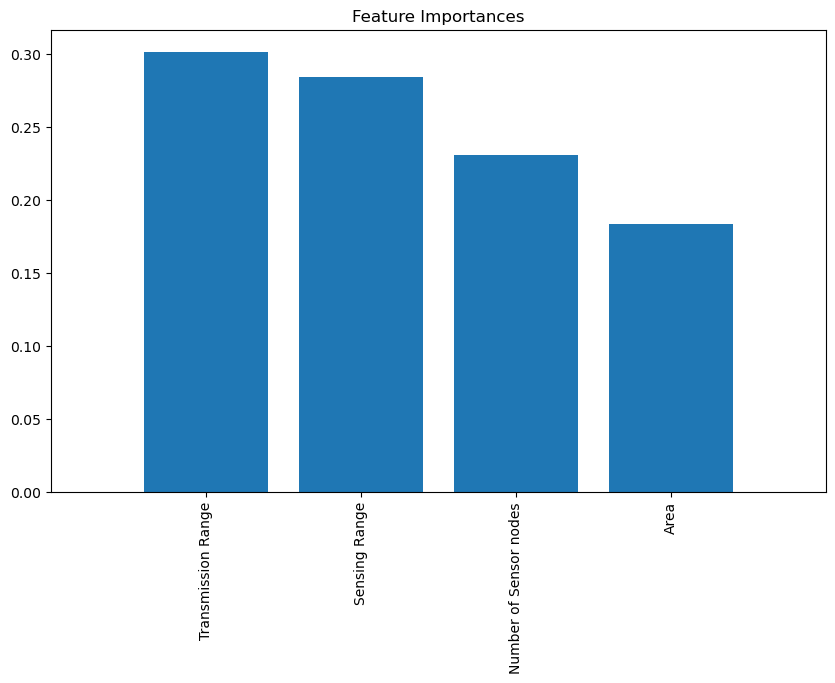

In [16]:
print('FEATURE SELECTION STAGE')

# Calculates correlation score for each input variable against target variable
correlation_matrix = df.corr()
print("Correlation with target variable:\n", correlation_matrix['Number of Barriers'].sort_values(ascending=False))

# Selects features with high correlation score
selected_features = correlation_matrix['Number of Barriers'][np.abs(correlation_matrix['Number of Barriers']) > 0.5].index.drop('Number of Barriers')
print("Selected features based on correlation:\n", selected_features)

# Uses Random Forest to rank features by importance
rf = RandomForestRegressor()
rf.fit(xrange_train, yrange_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Prints ranking by feature importance
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {df.columns[indices[f]]} ({importances[indices[f]]})")

# Produces a bar chart visualising feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), df.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [17]:
print('PRINCIPAL COMPONENT ANALYSIS (PCA')

# Reduces "noise" from the dataset by reducing features to a smaller set of new features
pca = PCA(n_components=2)
xrange_train_pca = pca.fit_transform(xrange_train_scaled)
xrange_test_pca = pca.transform(xrange_test_scaled)

# Explained variance ratio
print("Explained variance ratio:\n", pca.explained_variance_ratio_)

PRINCIPAL COMPONENT ANALYSIS (PCA
Explained variance ratio:
 [0.75045489 0.24954511]


In [18]:
print('LINEAR REGRESSION MODEL')

# Linear Regression model
lr = LinearRegression()
lr.fit(xrange_train_pca, yrange_train)
y_pred_lr = lr.predict(xrange_test_pca)

# Evaluation

# Linear Regression Training and Testing Accuracy
train_pred_lr = lr.predict(xrange_train_pca)
train_r2_lr = r2_score(yrange_train, train_pred_lr)
train_mse_lr = mean_squared_error(yrange_train, train_pred_lr)
train_rmse_lr = np.sqrt(train_mse_lr)
train_mae_lr = mean_absolute_error(yrange_train, train_pred_lr)

print(f"Linear Regression Training:\nR2: {train_r2_lr}\nMSE: {train_mse_lr}\nRMSE: {train_rmse_lr}\nMAE: {train_mae_lr}\n")

r2_lr = r2_score(yrange_test, y_pred_lr)
mse_lr = mean_squared_error(yrange_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(yrange_test, y_pred_lr)

print(f"Linear Regression:\nR2: {r2_lr}\nMSE: {mse_lr}\nRMSE: {rmse_lr}\nMAE: {mae_lr}\n")

LINEAR REGRESSION MODEL
Linear Regression Training:
R2: 0.9115405973160793
MSE: 303.80651416831904
RMSE: 17.430046304250574
MAE: 13.00156897089197

Linear Regression:
R2: 0.8474942208123317
MSE: 433.98908485166277
RMSE: 20.83240468240915
MAE: 16.760592988340825



In [19]:
print('SUPPORT VECTOR MACHINE (SVM) MODEL')

# Support Vector Machine
svr = SVR(kernel='rbf', C=1.0, gamma=0.2, epsilon=0.2)
svr.fit(xrange_train_pca, yrange_train)
y_pred_svr = svr.predict(xrange_test_pca)

# Evaluation

# Support Vector Machine Training and Testing Accuracy
train_pred_svr = svr.predict(xrange_train_pca)
train_r2_svr = r2_score(yrange_train, train_pred_svr)
train_mse_svr = mean_squared_error(yrange_train, train_pred_svr)
train_rmse_svr = np.sqrt(train_mse_svr)
train_mae_svr = mean_absolute_error(yrange_train, train_pred_svr)

print(f"Support Vector Machine Training:\nR2: {train_r2_svr}\nMSE: {train_mse_svr}\nRMSE: {train_rmse_svr}\nMAE: {train_mae_svr}\n")

r2_svr = r2_score(yrange_test, y_pred_svr)
mse_svr = mean_squared_error(yrange_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(yrange_test, y_pred_svr)

print(f"Support Vector Machine:\nR2: {r2_svr}\nMSE: {mse_svr}\nRMSE: {rmse_svr}\nMAE: {mae_svr}\n")



SUPPORT VECTOR MACHINE (SVM) MODEL
Support Vector Machine Training:
R2: 0.547667312550093
MSE: 1553.4992646239418
RMSE: 39.414455021272865
MAE: 24.620579084103788

Support Vector Machine:
R2: 0.29012780886767764
MSE: 2020.0990692428304
RMSE: 44.94551222583664
MAE: 27.879747183406383



In [20]:
print('RANDOM FOREST MODEL')

# Random Forest
rf = RandomForestRegressor()
rf.fit(xrange_train_pca, yrange_train)
y_pred_rf = rf.predict(xrange_test_pca)

# Evaluation
# Random Forest Training and Testing Accuracy
train_pred_rf = rf.predict(xrange_train_pca)
train_r2_rf = r2_score(yrange_train, train_pred_rf)
train_mse_rf = mean_squared_error(yrange_train, train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_mae_rf = mean_absolute_error(yrange_train, train_pred_rf)

print(f"Random Forest Training:\nR2: {train_r2_rf}\nMSE: {train_mse_rf}\nRMSE: {train_rmse_rf}\nMAE: {train_mae_rf}\n")

r2_rf = r2_score(yrange_test, y_pred_rf)
mse_rf = mean_squared_error(yrange_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(yrange_test, y_pred_rf)

print(f"Random Forest:\nR2: {r2_rf}\nMSE: {mse_rf}\nRMSE: {rmse_rf}\nMAE: {mae_rf}\n")

RANDOM FOREST MODEL
Random Forest Training:
R2: 0.9984219569793867
MSE: 5.419658450704227
RMSE: 2.3280159902166107
MAE: 1.4621830985915492

Random Forest:
R2: 0.9897417917732269
MSE: 29.192011111111103
RMSE: 5.402963178766917
MAE: 4.1211111111111105



MODEL COMPARISON
Training model performance metrics:
                               R2          MSE       RMSE        MAE
Linear Regression       0.911541   303.806514  17.430046  13.001569
Support Vector Machine  0.547667  1553.499265  39.414455  24.620579
Random Forest           0.998422     5.419658   2.328016   1.462183


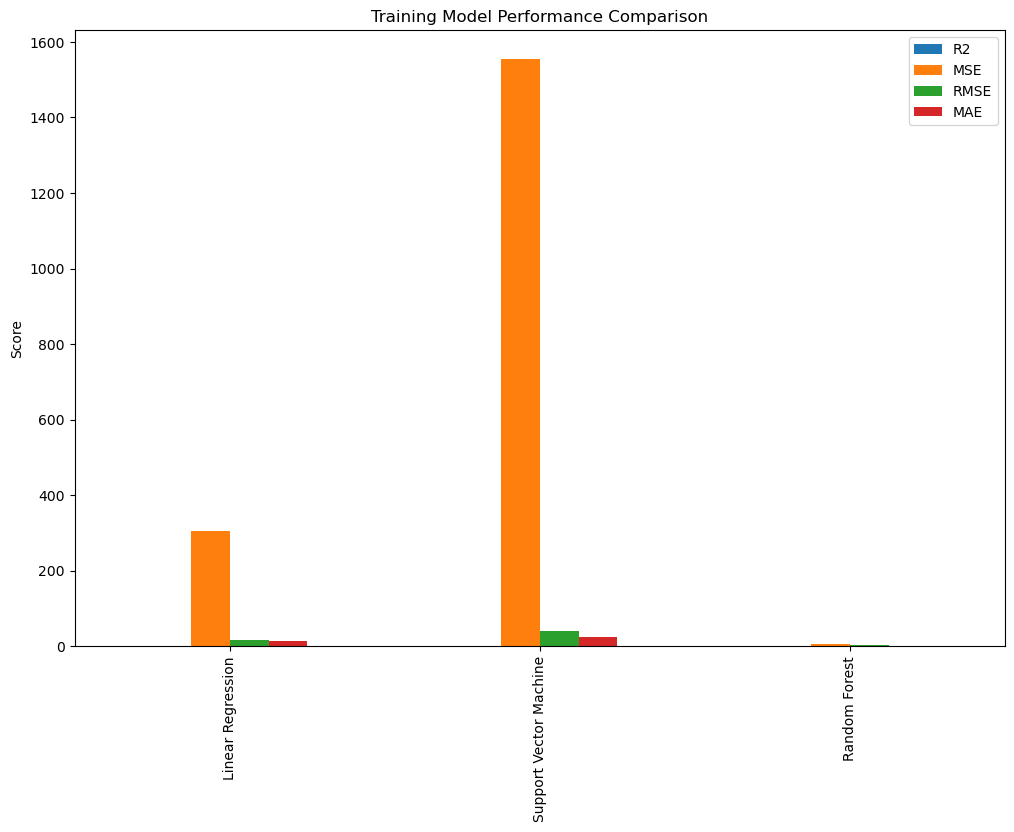

Testing model performance metrics:
                               R2          MSE       RMSE        MAE
Linear Regression       0.847494   433.989085  20.832405  16.760593
Support Vector Machine  0.290128  2020.099069  44.945512  27.879747
Random Forest           0.989742    29.192011   5.402963   4.121111


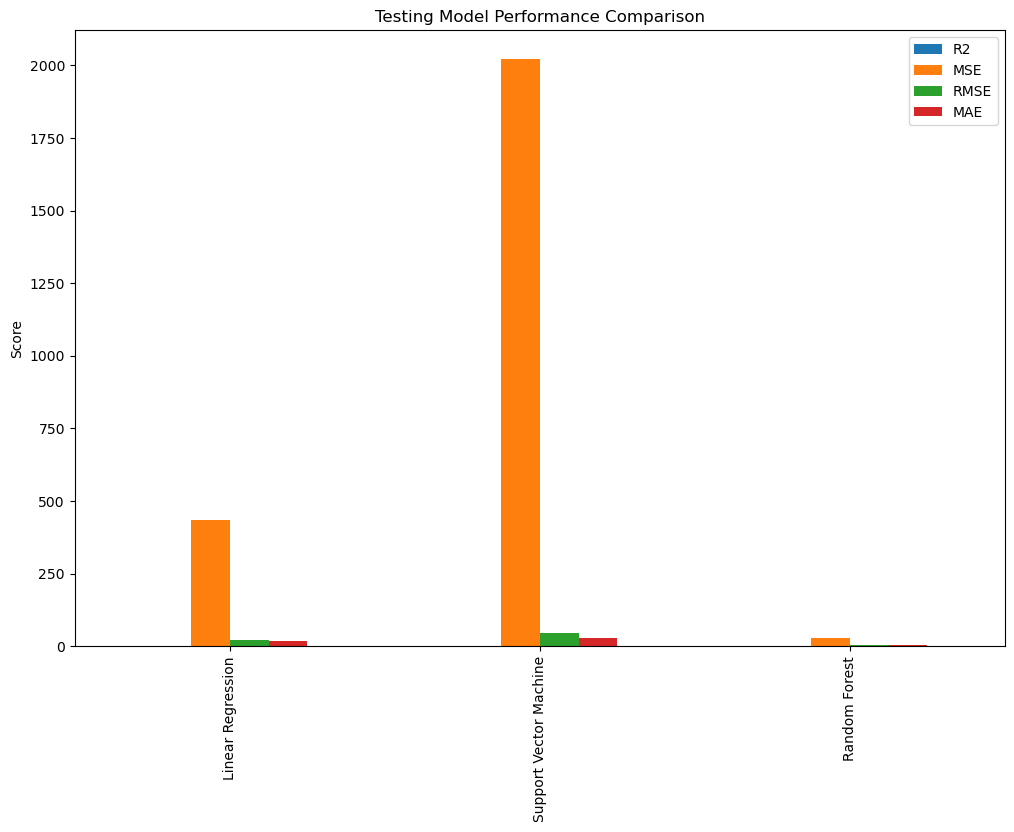

In [21]:
print('MODEL COMPARISON')

# Train Results
train_results = {
    'Linear Regression': [train_r2_lr, train_mse_lr, train_rmse_lr, train_mae_lr],
    'Support Vector Machine': [train_r2_svr, train_mse_svr, train_rmse_svr, train_mae_svr],
    'Random Forest': [train_r2_rf, train_mse_rf, train_rmse_rf, train_mae_rf]
} # Creates a dictionary to store metrics for each model 

train_results_df = pd.DataFrame(train_results, index=['R2', 'MSE', 'RMSE', 'MAE']).T # Loads training results into new DataFrame
print("Training model performance metrics:\n", train_results_df)

# Plotting the training results
train_results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Training Model Performance Comparison')
plt.ylabel('Score')
plt.show()

#Test results
test_results = {
    'Linear Regression': [r2_lr, mse_lr, rmse_lr, mae_lr],
    'Support Vector Machine': [r2_svr, mse_svr, rmse_svr, mae_svr],
    'Random Forest': [r2_rf, mse_rf, rmse_rf, mae_rf]
} # Creates a dictionary to store metrics for each model

test_results_df = pd.DataFrame(test_results, index=['R2', 'MSE', 'RMSE', 'MAE']).T
print("Testing model performance metrics:\n", test_results_df) #Loads testing results into new DataFrame

# Plotting the testing results
test_results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Testing Model Performance Comparison')
plt.ylabel('Score')
plt.show()